# Classification of Iris Species using Neural Networks

In this project, we construct a neural network for a classification task using only `NumPy`, leveraging fundamental concepts from linear algebra, probability theory, and computational graphs. The goal is to build the network from scratch without relying on high-level deep learning libraries, emphasizing vectorization and broadcasting for efficient computations.

This work aims to deepen the understanding of the mathematical foundations behind artificial neural networks (ANNs) by implementing their core structure and learning mechanisms directly.

### The Iris Dataset

The Iris dataset consists of 4 measurements from a sample of 50 flowers from 3 species of Iris. The goal is to build a classifier able to predict the correct class (of the 3 Iris species available in the dataset) for a new given measurement.  

**Familiarising ourselves with the data:**
- Importing relavant libraries
- Loading the data
- Storing the data into feature and taget variables
- Printing the relavanet details pertaining to the data


In [101]:
# Import necessary libraries
#We plot matplotlib for plotting relevant grpahs to make inferences
import matplotlib.pyplot as plt
#Numpy to make numerical calculations
import numpy as np
#For loading in the data from existing package
from sklearn.datasets import load_iris

#Loading the data
iris = load_iris()

# print(iris)  this was done to understand how the data is contained
#From observing the Iris dataset is a dictionary containing features (X), labels (Y), class names and other info


#Storing the features in variable X
X = iris['data']

#Storing the outputs in variable Y
y = iris['target']

#Storing the class names in variable names
names = iris['target_names']

#Observing the content of the dataset
print(f"The measured features are:\n{iris['feature_names']} \n")
print(f"The classes of Iris in the dataset are:\n{names} \n")

#Looking at a section of the data
print(f"The first 3 measurements are:\n{X[:3]}\n")
print(f"The class identifiers of the first 3 plants are: \n {y[:3]}")
print(f"Which can be translated to classes: \n {names[y[:3]]}")

The measured features are:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

The classes of Iris in the dataset are:
['setosa' 'versicolor' 'virginica'] 

The first 3 measurements are:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

The class identifiers of the first 3 plants are: 
 [0 0 0]
Which can be translated to classes: 
 ['setosa' 'setosa' 'setosa']


**Understanding the Dataset:**

- The dataset contains sepal length, sepal width, petal length and petal width which are considered as the features $X\in \mathbb{R}^{m\times n_{x}}$ where $m$ is the number of training samples and $n_{x}$ is the number of features taken into consideration.

- Here $m=150$ and $n_{x}=4$, i.e. we have 150 training samples which are the flowers, and 4 features which are the measurements of the sepals and petals of the flowers.

- Our targets include values 0, 1 and 2, i.e. $y\in \{0,1,2\}$. The flower names are Setosa, Versicolor and Virginica encoded as 0, 1 and 2 respectively.

- From $y$ we observe that the first 50 flowers are Setosas, next 50 are Versicolors and the last 50 are Virginica. Therefore, in total we have 150 training samples as mentioned in the second pointer.

- In summary, the dataset $(\boldsymbol{x}^{(i)}, y^{(i)})$ consists of 150 datapoints (50 examples for each class). Each feature vector $\boldsymbol{x}^{(i)} \in \mathbb{R}^4$, for $i = 1, \ldots, 150$, has length 4, with corresponding labels $y^{(i)} \in \mathbb{R}$, for $i = 1, \ldots, 150$, which are equal to either 0 (Setosa), 1 (Versicolor) or 2 (Virginica).


**Finding some important content pertaining to the dataset:**

- Calculating the number of samples and store it in variable $m$
- Storing the number of classes
- Displaying relavant shapes of the data matrices
        
        

In [102]:
# Lets just find the number of training samples and record the shape of our input

m = X.shape[0]
Y = y.reshape((1,y.shape[0]))
K = 3

print("Number of training sample in the Iris dataset = " + str(m))
print("X shape = " + str(X.shape))
print("y shape = " + str(Y.shape))
print("Number of classes =",K)


Number of training sample in the Iris dataset = 150
X shape = (150, 4)
y shape = (1, 150)
Number of classes = 3


### Visualizing the Data

**Plotting the datapoints to obtain the scatterplots:**
- Slicing the features in $X$ to sepal measurements and petal measurements
- Creating two separate scatter plots using `matplotlib.pyplot` package's `scatter` function
- The sepal measurement datapoints and petal measurement datapoints are plotted separately.
- Distinguishing the type of flowers using the `color` attribute
- Plotting the necessary details like title, axes names and legend to complete the visual presentation



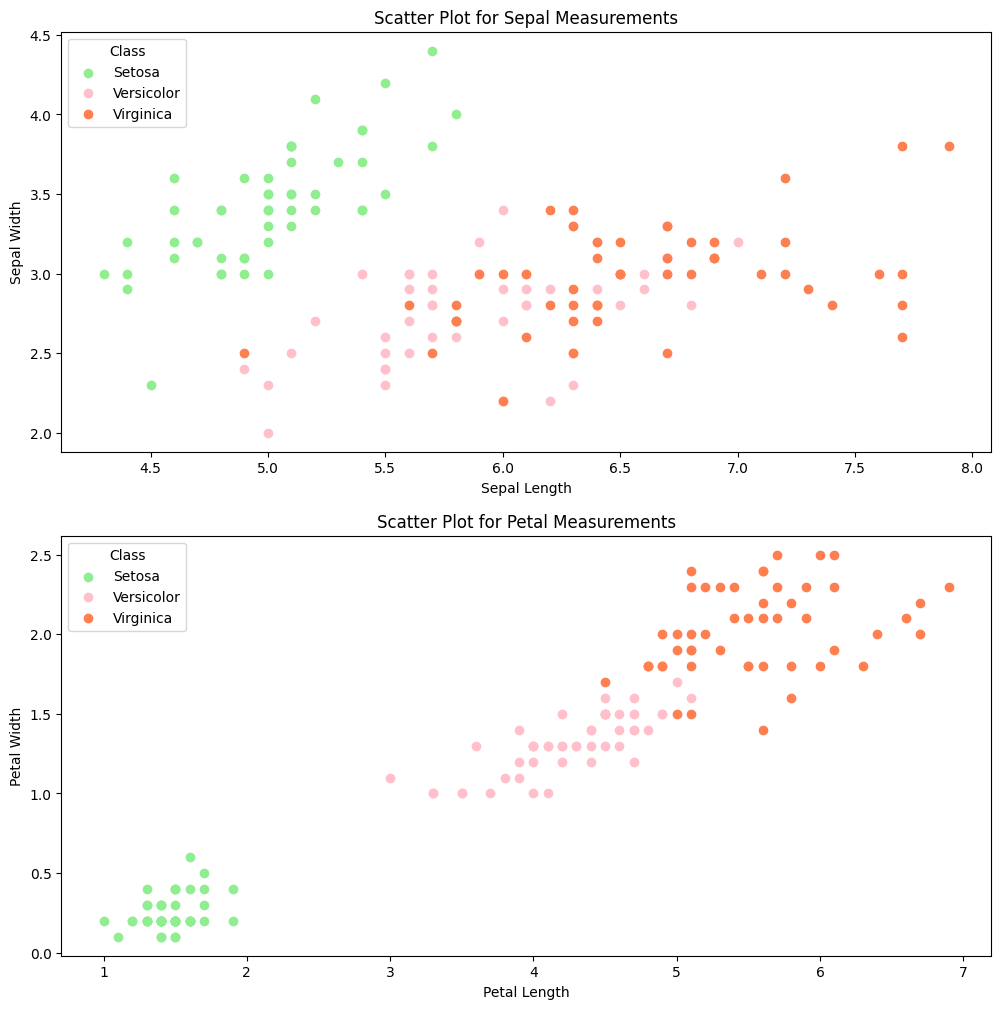

In [103]:
# Defining X_sepal and X_petal -slicing the data set to separate sepal and petal measurements
X_sepal = np.array(X[:,:2])
#print(X_sepal) - done to cross-verify
X_petal = np.array(X[:,2:])
#print(X_petal) - done to cross-verify


#Creating a figure consisting of 2 subplots one below the other
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211) #Graph in the first position
ax2 = fig.add_subplot(212) #Graph in the second position

#Plotting the scatter plot for Sepal Measurements
#For Sertosa - Class 0
ax1.scatter(X_sepal[:50,0],X_sepal[:50,1],color='lightgreen', label='Setosa')
#For Versicolor - Class 1
ax1.scatter(X_sepal[50:100,0],X_sepal[50:100,1],color='pink', label='Versicolor')
#For Virginica - Class 2
ax1.scatter(X_sepal[100:,0],X_sepal[100:,1],color='coral', label='Virginica')
#Completing the plot with important labels
ax1.legend(title="Class",loc='upper left')
ax1.set_title('Scatter Plot for Sepal Measurements')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')



#Plotting the scatter plot for Petal Measurements
#For Sertosa - Class 0
ax2.scatter(X_petal[:50,0],X_petal[:50,1],color='lightgreen', label='Setosa')
#For Versicolor - Class 1
ax2.scatter(X_petal[50:100,0],X_petal[50:100,1],color='pink', label='Versicolor')
#For Virginica - Class 2
ax2.scatter(X_petal[100:,0],X_petal[100:,1],color='coral', label='Virginica')
#Completing the plot with important labels
ax2.legend(title="Class",loc='best')
ax2.set_title('Scatter Plot for Petal Measurements')
ax2.set_xlabel('Petal Length')
ax2.set_ylabel('Petal Width')

#Displaying the plots
plt.show()


**Observations and Inferences:**

- As observed in both scatter plots, we can separate the features of interests (sepal and petal measurements) between the class 0 (Sertosa) and the other two, namely class 1 (Versicolor) and class 2 (Virginica).
- We can fit simple linear regression lines between class 0 and the other two classes (Sertosa sepal measurements are failry distinct). However, it is difficult to fit a line between datapoints of Virginica and Versicolor. In some sense, if there were two classes - 0 and (1 or 2) only then we could easily fit a simple linear regression line, but the sepal measuurements of class 1 and 2 are overlapping and it is difficult to fit a linear regression line between them.
- For petal measurements however, there is almost a clear division between the scatter points. The fitted lines almost pefectly divide the data except a few datapoints for Versicolor and Virginica. Ideally a good model should generate a decision boundary that can almost accurately divide the classes based on the petal measurements.
- When we look to distinguish between Versicolor and Virginica, a fitted simple linear regression model would not work. Only a highly specified, non-linear and customized model would realisitically be able to classify the features of interests.
- In conclusion, a linear model would be inaccurate and not classify the features properly. Therefore, it would be ideal to perform a iteritive deep learning algorithm.



## Building the model for classification


In the case of the Iris dataset, we have three distinct classes, meaning a binary classification model is not suitable. Instead of the sigmoid activation function, which is typically used for binary classification, we will use the **softmax function**, which generalizes sigmoid to multiple classes.

The softmax function, denoted as $ g: \mathbb{R}^K \rightarrow \mathbb{R}^K $, is defined as:

$$
[g(\boldsymbol{t})]_k = \frac{e^{t_k}}{\sum_{j=1}^K e^{t_j}}
$$
for a given input vector $\boldsymbol{t} = (t_k)_{k=1}^K \in \mathbb{R}^K $, where the notation $[\boldsymbol{z}]_k $ represents the $ k $-th component of the vector $ \boldsymbol{z} $.




**The one-hot encoding vector**:


We introduce another notation known as the one-hot encoding vector:

- Recall that the $y^{(i)} \in \mathbb{R}$ takes either the value 0,1 or 2, depending on the Iris species: 0 (Setosa), 1 (Versicolor) or 2 (Virginica).
- This is not very convenient for our model, and it is in fact better to transform the values $y^{(i)} \in \mathbb{R}$ into another format: the transformation we use is known as **one-hot encoding**.
- This represents a label $y^{(i)} \in \mathbb{R}$ in the category $k$ (i.e., $y^{(i)}=k$), by the vector $\mathbf{y}^{(i)} = [0,\dots,0,1,0,\dots,0]$, where the $k^\text{th}$ element $\mathbf{y}_k$ is $1$, and all other $K-1$ elements are zero.
- From here onwards we use the bold notation $\mathbf{y} = (\mathbf{y}_j)_{j=1}^K \in \mathbb{R}^K$ to represent the one-hot encode (notice in particular that we use bold also for the components $\mathbf{y}_j \in \mathbb{R}$ of the one-hot encode vector!), and the notation $y \in \mathbb{R}$ to represent the class number (that is, the original label).

**Formulating the one-hot encoding vector:**

- **Initialize a zero matrix** of shape $ (m, K) $, where:  
  - $ m $ is the number of samples.  
  - $ K $ is the number of classes (in this case, 3).  

- **Apply one-hot encoding** using broadcasting:  
  - Each sample label from the target vector $y$ (which contains values 0, 1, or 2) is used as an index.  
  - The corresponding positions in the zero matrix are set to 1, effectively creating one-hot encoded vectors.  



In [104]:
#Initializing the vector with zeroes and appropriate dimensions
y_one_hot = np.zeros((m, K))

#Without broadcasting
#for i in range(num_samples):
    #y_one_hot[i][y[i]] = 1

#Using broadcasting we replace the k-th element with 1
y_one_hot[np.arange(m), y] = 1


**The Classification Problem**  

The goal is to design an algorithm that, given a new feature vector $ \boldsymbol{x}^{(i)} $ (in this case, a set of sepal and petal measurements), can predict the class $ j $ to which the sample belongs. Mathematically, we express this as:  

$$
\widehat{y}_k^{(i)} = p(\text{predicted label} = k \mid \boldsymbol{x}^{(i)}) = [g(\boldsymbol{W}^\top \boldsymbol{x}^{(i)} + \boldsymbol{b})]_k
= \frac{e^{[\boldsymbol{W}^\top \boldsymbol{x}^{(i)} + \boldsymbol{b}]_k}}{\sum_{j=1}^K e^{[\boldsymbol{W}^\top \boldsymbol{x}^{(i)}+\boldsymbol{b}]_j}}
$$

where:  
- $ \widehat{y}_k^{(i)} $ represents the probability that sample $ i $ belongs to class $ k $.  
- $ \boldsymbol{W} $ and $ \boldsymbol{b} $ are the model parameters (weights and biases, respectively).  
- $ g(\cdot) $ is the softmax function, ensuring that the predicted probabilities sum to 1.  

In the context of the Iris dataset, this probability represents how likely it is that a flower with the given measurements belongs to a particular species.  

**Understanding the Model Parameters**  
- The input feature vector $ \boldsymbol{x}^{(i)} $ has 4 components (sepal and petal length/width), so $ \boldsymbol{x}^{(i)} \in \mathbb{R}^4 $.  
- The model parameters are:  
  - **Weights:** $ \boldsymbol{W} \in \mathbb{R}^{4 \times 3} $, mapping the 4 input features to the 3 output classes.  
  - **Biases:** $ \boldsymbol{b} \in \mathbb{R}^3 $, providing an additional degree of flexibility to the decision boundaries.  

**Interpreting the Output Vector $ \widehat{\boldsymbol{y}} $**  
From the softmax equation, we define the vector:  

$$
\widehat{\boldsymbol{y}} = (\widehat{y}_j)_{j=1}^K \in \mathbb{R}^K
$$

where each component $ \widehat{y}_j = p(\text{predicted label} = j \mid \boldsymbol{x}) $ represents the probability that the given measurements belong to class $ j $.  

**Note:** This is not a one-hot encoded vector! Unlike one-hot encoding (which contains only 0s and a single 1), the values in $ \widehat{\boldsymbol{y}} $ are real numbers between 0 and 1, representing confidence scores across all classes. The highest probability determines the predicted class.  



**Implementing the `p_model` Function**


The function `p_model` computes the predicted class probabilities based on the given input features and model parameters.  

**Inputs:**  
- $ \boldsymbol{X} $: A matrix containing the four measurements (sepal and petal length/width) for all samples in the dataset.  
- $ \boldsymbol{W} $: The weight matrix of the model.  
- $ \boldsymbol{b} $: The bias vector.  

**Output:**  
- A probability vector $ \widehat{\boldsymbol{y}} = (\widehat{y}_j)_{j=1}^K \in \mathbb{R}^K $, where each component represents the probability of a given sample belonging to class $ j $.  

**Steps in the `p_model` Function:**  

1. **Ensure Proper Dimensions:**  
   - Transpose $ \boldsymbol{X} $ if needed to align with $ \boldsymbol{W} $ for matrix multiplication.  

2. **Compute the Linear Transformation:**  
   - Calculate $ Z $, which represents the raw class scores before applying softmax:  
     $$
     Z = \boldsymbol{W}^\top \boldsymbol{X} + \boldsymbol{b}
     $$  

3. **Apply the Softmax Function:**  
   - Convert raw scores $ Z $ into probabilities:  
$$
     \widehat{y}_k^{(i)} =  \frac{e^{Z_k}}{\sum_{j=1}^K e^{Z_j}}
$$  
   - This ensures that each predicted probability falls between 0 and 1 and that the sum of probabilities across all classes is 1.  



In [105]:
def p_model(X, W, b):
    """
    Compute the probabilities in equation (2)

    Arguments:
    X - data of size (num_meas, number of examples)
    W - weights, a numpy array of size (num_meas, num_class)
    b - bias, a numpy array of size (num_class,1)

    Return:
    y_hat - vector of probabilities
    """
    # Compute y_hat

    # We transpose X to get it of appropriate dimension
    X = X.T
    #We re-shape B to avoid error
    b = b.reshape(b.shape[0],-1)

    #Calculating Z = Wt.X + b
    Z = np.dot(W.T,X) + b

    #Caculating predictions
    numerator = np.exp(Z)
    #Summing across rows (axis = 0) since those signify the classes
    denominator = np.sum(numerator, axis = 0, keepdims = True)

    #We transpose it so as to match the test function output dimensions
    y_hat = (numerator / denominator).T

    return y_hat

In [106]:
# Testing the code
W_t = np.array([[0.976104, 0.0604506,  0.135916],[0.310450, 0.051029, 0.23037],[0.298401, 0.276497, 0.465858],[0.828231, 0.877787, 0.23206]])
b_t = np.array([0.964628, 0.810731, 0.602419])


p_model(X, W_t, b_t)

y_t = p_model(X, W_t, b_t)

print(np.mean(y_t,axis=0)) # it should return [0.99276867 0.00229554 0.0049358]


[0.99276867 0.00229554 0.0049358 ]


**Cross-Entropy Cost Function for Softmax Regression**  

To train our neural network, we need to define a suitable cost function that evaluates how well the predicted probabilities match the true labels. Using the principle of **Maximum Likelihood Estimation (MLE)**, we arrive at the **cross-entropy loss function**, which is commonly used for multi-class classification problems.

For a dataset containing $ m $ training examples $ (\boldsymbol{x}^{(i)}, y^{(i)}) $, where $ y^{(i)} $ represents the true class label, the cost function is given by:

$$
\mathcal{J}(\boldsymbol{W},\boldsymbol{b}) = -\frac{1}{m} \sum_{i=1}^m \sum_{j=1}^K \mathbf{y}_j^{(i)} \log(\widehat{y}^{(i)}_j)
$$

where:  
- $ \mathbf{y}^{(i)}_j $ is the $ j^{\text{th}} $ component of the one-hot encoded vector representing the true label of the $ i^{\text{th}} $ sample.  
- $ \widehat{y}^{(i)}_j $ is the predicted probability for class $ j $, obtained using the softmax function.  

**Intuition Behind Cross-Entropy Loss**

The cross-entropy loss measures the dissimilarity between the predicted probability distribution and the true class labels. It penalizes incorrect predictions by assigning a higher loss when the predicted probability for the correct class is low.  

For a single training example, the loss function is:  
$$
\mathcal{L}(\widehat{y}, y) = - \sum_{j=1}^{K} \mathbf{y}_j \log(\widehat{y}_j)
$$
Since $ \mathbf{y}_j $ is one-hot encoded, only the term corresponding to the true class contributes to the loss, effectively reducing the problem to:  
$$
\mathcal{L}(\widehat{y}, y) = -\log(\widehat{y}_{\text{true class}})
$$
This means that the model is encouraged to assign high probabilities to the correct class, thereby minimizing the loss.  

**Why Cross-Entropy?**
- It ensures that the predicted probability distribution closely aligns with the actual class distribution.  
- Unlike squared error loss, cross-entropy is well-suited for classification as it avoids vanishing gradients when probabilities are close to 0 or 1.  
- It simplifies the optimization process by providing a convex loss landscape for logistic regression models.  

Thus, the cross-entropy cost function serves as an effective objective for training softmax-based neural networks for classification tasks.


**Implement the ```cost``` function that computes the cost function**

The function should take as input the vector of probabilities $\widehat{\boldsymbol{y}} = (\widehat{y}_j)_{j=1}^K \in \mathbb{R}^K$ (i.e., the output computed by the function ```p_model```) and the true labels $y$ (i.e., those provided with the data set). It returns the value of the cost function

**What we do in `cost` function:**

- We compute the one-hot encoding vector $\mathbf{y} = (\mathbf{y}_j)_{j=1}^K \in \mathbb{R}^K$
- We compute and return the total cost using the suitable cost function given by:
$$ \mathcal{J}(\boldsymbol{W},\boldsymbol{b}) = - \frac{1}{m}\sum_{i=1}^m \sum_{j=1}^K \mathbf{y}_j^{(i)} \log(\widehat{y}^{(i)}_j) \qquad $$ where, for each example $i=1,\ldots,m$ in the dataset $(\boldsymbol{x}^{(i)}, y^{(i)})$,  $\mathbf{y}^{(i)}_j$ is the $j^{\text{th}}$ entry of the one-hot encode vector $\mathbf{y}^{(i)}$ associated with the true labels $y^{(i)}$, and $\widehat{y}^{(i)}_j$ is the prediction as defined in (2) for the $i^{\text{th}}$ example in the training set.


In [107]:
def cost(y,y_hat):
    """
    Compute the cost function in equation (3)

    Arguments:
    y - true "label" (containing 0 if setosa, 1 if Versicolor or 2 if Virginica)
    y_hat - vector containing the probabilities of a flower with measurements x being in each class

    Return:
    tot_cost - value of the cost function
    """


    # Computing one-hot encode associated with the true labels y

    #First let us generate a vector y of zeros with dimensions m * K
    y_one_hot = np.zeros((m, K))
    #Replacing the k-th term with 1
    y_one_hot[np.arange(m), y] = 1


    # Computing the loss
    loss = np.sum(y_one_hot * np.log(y_hat), axis = 1)

     #Computing the cost
    tot_cost = - (1/m) * np.sum(loss)

    return tot_cost


In [108]:
#Testing with previous case

W_t = np.array([[0.976104, 0.0604506,  0.135916],[0.310450, 0.051029, 0.23037],[0.298401, 0.276497, 0.465858],[0.828231, 0.877787, 0.23206]])
b_t = np.array([0.964628, 0.810731, 0.602419])


y_t = p_model(X, W_t, b_t)
print(cost(y,y_t))

4.25695736524871


## Training the Model with Gradient Descent

Neural networks learn by adjusting their parameters to minimize the difference between their predictions and actual labels. The first layer processes raw input data, extracts features, and passes the output to the next layer. This continues through successive layers until the final layer produces a prediction. The prediction is compared with the true labels, and using **backpropagation**, the model adjusts its weights to improve accuracy. The optimization method used for this adjustment is **gradient descent**, which iteratively updates parameters based on computed gradients.

**Computing the Gradients**

We define our model as:

$$
\boldsymbol{Z} = \boldsymbol{W} \boldsymbol{X} + \boldsymbol{b}
$$

Applying the **softmax function** to obtain class probabilities:

$$
\widehat{\boldsymbol{Y}} = \text{softmax} (\boldsymbol{Z}) = \frac{e^{\boldsymbol{Z}}}{\sum_{j=1}^{K} e^{\boldsymbol{Z}_j}}
$$

The cost function used is **cross-entropy loss**:

$$
\mathcal{J}(\boldsymbol{W}, \boldsymbol{b}) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{j=1}^{K} \mathbf{y}_j^{(i)} \log (\widehat{y}_j^{(i)})
$$

where:
- $ m $ is the number of training samples,
- $ \mathbf{y}^{(i)} $ is the one-hot encoded ground truth for the $ i $-th sample,
- $ \widehat{y}^{(i)} $ is the predicted probability for class $ j $.

Using backpropagation, we compute the gradients:

$$
\nabla_{\boldsymbol{W}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b})
    = \frac{1}{m} (\widehat{\boldsymbol{Y}} - \mathbf{Y}) X^\top
$$

$$
\nabla_{\boldsymbol{b}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b})
    = \frac{1}{m} \sum_{i=1}^{m} (\widehat{\boldsymbol{y}}^{(i)} - \mathbf{y}^{(i)})
$$

where $ \widehat{\boldsymbol{Y}}, \mathbf{Y} \in \mathbb{R}^{K \times m} $ are matrices:

$$
\widehat{\boldsymbol{Y}} = \begin{bmatrix} | & & | \\
    \widehat{\boldsymbol{y}}^{(1)} & \cdots & \widehat{\boldsymbol{y}}^{(m)} \\
    | & & |
\end{bmatrix},
$$

$$
\mathbf{Y} = \begin{bmatrix} | & & | \\
    \mathbf{y}^{(1)} & \cdots & \mathbf{y}^{(m)} \\
    | & & |
\end{bmatrix}.
$$

**Updating Parameters with Gradient Descent**

Using these gradients, we update the parameters iteratively:

$$
\boldsymbol{W} := \boldsymbol{W} - \alpha \nabla_{\boldsymbol{W}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b})
$$

$$
\boldsymbol{b} := \boldsymbol{b} - \alpha \nabla_{\boldsymbol{b}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b})
$$

where $ \alpha $ is the learning rate, controlling the step size of updates.

**Why Gradient Descent?**

The reason for implementing gradient descent is to iteratively improve model performance by minimizing the loss function. Since neural networks have complex, high-dimensional weight spaces, an analytical solution for optimal parameters is often infeasible. Gradient descent provides an efficient, scalable way to navigate this space and converge towards an optimal set of parameters.


By leveraging gradient descent and backpropagation, our neural network continuously refines its weights, allowing it to learn meaningful patterns and generalize to unseen data.



Here’s a polished version of your write-up with improved clarity and structure:  


**Implementing the `grad_cost` Function**  

The `grad_cost` function computes the gradient of the cost function with respect to the weights $ \boldsymbol{W} $ and biases $ \boldsymbol{b} $.  

**Inputs:**  
- **$ \boldsymbol{X} $**: The matrix containing all input features in the training set.  
- **$ \mathbf{Y} $**: The true labels (one-hot encoded).  
- **$ \boldsymbol{W}, \boldsymbol{b} $**: The model parameters (weights and biases).  

**Outputs:**  
- The gradients $ \nabla_{\boldsymbol{W}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b}) $ and $ \nabla_{\boldsymbol{b}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b}) $, which will be used to update the parameters during training.  

**Steps in the `grad_cost` function:**  

1. Compute the predicted probabilities using the previously defined function `p_model`.  
2. Convert the true labels into a one-hot encoded matrix.  
3. Compute the gradients using the formulas:  

$$
\nabla_{\boldsymbol{W}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b})
= \frac{1}{m} (\widehat{\boldsymbol{Y}} - \mathbf{Y}) X^\top
$$

$$
\nabla_{\boldsymbol{b}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b})
= \frac{1}{m} \sum_{i=1}^m (\widehat{\boldsymbol{y}}^{(i)} - \mathbf{y}^{(i)})
$$

where:
- $ \widehat{\boldsymbol{Y}} $ is the matrix of predicted probabilities.  
- $ \mathbf{Y} $ is the one-hot encoded matrix of true labels.  
- $ m $ is the number of training examples.  

This function plays a crucial role in optimizing the model by providing the necessary gradients for updating the parameters using gradient descent.  


In [109]:
def grad_cost(X, y, W, b):
    """
    Compute the gradient of the cost function

    Arguments:
    X - data of size (num_meas, number of examples)
    y - true "label" (containing 0 if setosa, 1 if Versicolor or 2 if Virginica)
    W - weights, a numpy array of size (num_meas, num_class)
    b - bias, a numpy array of size (num_class,1)

    Return:
    W_grad - gradient cost function w.r.t. W
    b_grad - gradient cost function w.r.t. b
    """

    # Computing the probabilities and transposing to get it of K*m dimension
    y_hat = p_model(X, W, b).T

    # Computing one-hot encode associated with the true labels y
    y_one_hot = np.zeros((m, K))
    y_one_hot[np.arange(m), y] = 1
    Y = y_one_hot.T #Transposing for the dimensions

    # Computing final gradient
    W_grad = np.dot((y_hat - Y),X) / m
    #We don't take X^t above since X is originally has m*K dimensions
    b_grad = np.sum((y_hat - Y), axis = 1) / m

    #Returning transposes to match the testing outputs
    return W_grad.T, b_grad.T

In [110]:
#Testing with previous case

# Test your code
W_t = np.array([[0.976104, 0.0604506,  0.135916],[0.310450, 0.051029, 0.23037],[0.298401, 0.276497, 0.465858],[0.828231, 0.877787, 0.23206]])
b_t = np.array([0.964628, 0.810731, 0.602419])


W_grad, b_grad = grad_cost(X, y, W_t, b_t)

print(W_grad)
print(b_grad)

[[ 4.13634178 -1.96643489 -2.16990689]
 [ 1.89234102 -0.91633558 -0.97600544]
 [ 3.25117088 -1.41350061 -1.83767027]
 [ 1.11190516 -0.4401248  -0.67178036]]
[ 0.65943533 -0.3310378  -0.32839754]


**Implementing the `train` Function for Optimization**  

We are now ready to implement the main function, which optimizes the cost function over the model parameters.  

**Overview of the `train` Function**  

The `train` function iteratively applies gradient descent to minimize the cost function. It repeatedly uses the `grad_cost` function to compute the gradients with respect to the weights and biases and updates the parameters $ \boldsymbol{W} $ and $ \boldsymbol{b} $ accordingly. Additionally, it tracks the values of the cost function over iterations to monitor the optimization progress.  

**Inputs:**  
- **$ \boldsymbol{X} $**: The matrix containing all input features in the training set.  
- **$ \mathbf{Y} $**: The true labels (one-hot encoded).  
- **$ \boldsymbol{W}, \boldsymbol{b} $**: The initial values for the model parameters.  
- **`max_iterations`**: The maximum number of gradient descent steps.  
- **`learning_rate`**: The step size for updating parameters.  

**Outputs:**  
- The optimized (learned) parameters $ \boldsymbol{W} $ and $ \boldsymbol{b} $.  
- A vector containing the cost function values at each iteration.  

**Steps in the `train` Function:**  

1. Compute the cost and gradients using the previously defined `cost` and `grad_cost` functions.  
2. Update the parameters using the gradient descent update rule:  

$$
\boldsymbol{\theta}_{k+1} = \boldsymbol{\theta}_k - \alpha_k \nabla \mathcal{J} (\boldsymbol{\theta}_k)
$$

where:
- $ \boldsymbol{\theta}^{T} = (\boldsymbol{W}^{T}, b) $ represents the model parameters.  
- $ \alpha_k $ is the learning rate.  

This function ensures that the model gradually learns optimal parameters by iteratively reducing the cost function, leading to improved predictions.  



In [111]:
def train(X, y, lr, iters, W,b, print_cost = False):
    """
    Builds the model by calling the function implemented previously

    Arguments:
    X - data of size (num_meas, number of examples)
    y - true "label" (containing 0 if setosa, 1 if Versicolor or 2 if Virginica)
    lr - learning rate of the gradient descent update rule
    iters - number of iterations of the optimisation loop
    W - initialisation for weights, a numpy array of size (num_meas, num_class)
    b - initialisation for biases, a numpy array of size (num_class,1)

    Return:
    W - learned weights
    b - learned biases
    costs - array containing the values of the cost function
    """

    # Empty list to store cost function values
    costs = []

    # Training loop
    for i in range(iters):

        # Calculating prediction
        y_hat = p_model(X, W, b)
        c = cost(y,y_hat)
        W_grad, b_grad = grad_cost(X, y, W, b)

        # Updating the parameters
        W = W - lr * W_grad
        b = b - lr * b_grad

        # Calculating loss and appending it in the list
        if i % 100 == 0:
            costs.append(c)


        # Printing out the loss at every 100th iteration
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, c))

    return W, b, costs

In [112]:
# Test your code
W_t = np.array([[0.976104, 0.0604506,  0.135916],[0.310450, 0.051029, 0.23037],[0.298401, 0.276497, 0.465858],[0.828231, 0.877787, 0.23206]])
b_t = np.array([0.964628, 0.810731, 0.602419])

lr = 0.1
iters = 1000
W, b, costs = train(X, y, lr, iters, W_t, b_t, print_cost = False)

print(W)
print(b)

[[ 1.40442662  1.08597363 -1.31792964]
 [ 2.09467168  0.02366878 -1.52649146]
 [-2.61926546  0.20303037  3.4569911 ]
 [-0.49504929 -0.4479664   2.88109369]]
[ 1.29444834  1.524348   -0.44101834]


## **Testing the Model**  

Once the `train` function is implemented, we have all the necessary components to evaluate how well the model performs.  

**Evaluating the Model with Different Feature Configurations**  

We will test the model under three different configurations:  
1. Using only **petal measurements** as input features.  
2. Using only **sepal measurements** as input features.  
3. Using both **petal and sepal measurements** together.  

For each configuration, we initialize the model parameters (weights and biases) with random values, set the learning rate to **0.2**, and run gradient descent for **20,000 iterations**.  

**Steps for Testing:**  
- Set the learning rate and the number of iterations.  
- Initialize the parameters $ \boldsymbol{W} $ and $ \boldsymbol{b} $ randomly using the `random` function.  
- Run the `train` function and print relevant evaluation results.  

This process allows us to compare how different input features impact the model's performance and accuracy.  


In [113]:
#Setting the learning rate and maximum number of iterations
lr = 0.2
iters = 20000

In [114]:
#Using only petal measurements

#Initializing W and b according to required dimensions
W_test = np.random.rand(4,3)
b_test = np.random.rand(3,)

T1 = train(X_petal, y, lr, iters, W_test[:2,:], b_test, print_cost=True)


# Get predictions
y_hat_petal = p_model(X_petal, T1[0], T1[1])  # T1[0] -> W_trained, T1[1] -> b_trained
y_pred_petal = np.argmax(y_hat_petal, axis=1)  # Get class predictions

# Compute accuracy
accuracy = np.mean(y_pred_petal == y) * 100
print(f"Accuracy using only petal measurements: {accuracy:.2f}%")

Cost after iteration 0: 1.067456
Cost after iteration 100: 0.504247
Cost after iteration 200: 0.409338
Cost after iteration 300: 0.359522
Cost after iteration 400: 0.326349
Cost after iteration 500: 0.301742
Cost after iteration 600: 0.282360
Cost after iteration 700: 0.266504
Cost after iteration 800: 0.253191
Cost after iteration 900: 0.241798
Cost after iteration 1000: 0.231904
Cost after iteration 1100: 0.223210
Cost after iteration 1200: 0.215495
Cost after iteration 1300: 0.208595
Cost after iteration 1400: 0.202379
Cost after iteration 1500: 0.196745
Cost after iteration 1600: 0.191611
Cost after iteration 1700: 0.186911
Cost after iteration 1800: 0.182589
Cost after iteration 1900: 0.178599
Cost after iteration 2000: 0.174903
Cost after iteration 2100: 0.171468
Cost after iteration 2200: 0.168266
Cost after iteration 2300: 0.165273
Cost after iteration 2400: 0.162468
Cost after iteration 2500: 0.159834
Cost after iteration 2600: 0.157355
Cost after iteration 2700: 0.155016
Cost

In [115]:
#Using only sepal measurements

T2 = train(X_sepal, y, lr, iters, W_test[2:,:], b_test, print_cost =True )


# Get predictions
y_hat_sepal = p_model(X_sepal, T2[0], T2[1])  # T1[0] -> W_trained, T1[1] -> b_trained
y_pred_sepal = np.argmax(y_hat_sepal, axis=1)  # Get class predictions

# Compute accuracy
accuracy = np.mean(y_pred_sepal == y) * 100
print(f"Accuracy using only sepal measurements: {accuracy:.2f}%")


Cost after iteration 0: 1.590219
Cost after iteration 100: 1.064352
Cost after iteration 200: 0.949536
Cost after iteration 300: 0.900863
Cost after iteration 400: 0.871370
Cost after iteration 500: 0.850249
Cost after iteration 600: 0.833611
Cost after iteration 700: 0.819674
Cost after iteration 800: 0.807490
Cost after iteration 900: 0.796505
Cost after iteration 1000: 0.786375
Cost after iteration 1100: 0.776876
Cost after iteration 1200: 0.767858
Cost after iteration 1300: 0.759219
Cost after iteration 1400: 0.750889
Cost after iteration 1500: 0.742816
Cost after iteration 1600: 0.734967
Cost after iteration 1700: 0.727318
Cost after iteration 1800: 0.719852
Cost after iteration 1900: 0.712559
Cost after iteration 2000: 0.705431
Cost after iteration 2100: 0.698465
Cost after iteration 2200: 0.691658
Cost after iteration 2300: 0.685012
Cost after iteration 2400: 0.678525
Cost after iteration 2500: 0.672199
Cost after iteration 2600: 0.666036
Cost after iteration 2700: 0.660037
Cost

**Validation of Initial Observations Using Cost Function Minimization and Accuracy Metrics**  

Our cost function minimization results align with the insights drawn from the scatter plots. When training the model with **only petal measurements**, the cost function effectively reduces to **0.08**, and the model achieves a high accuracy of **96%**, indicating that petal features provide clear class separability.  

However, when using **only sepal measurements**, the cost function stagnates around **0.5** even after **20,000 iterations**, and the accuracy reaches only **75.33%**. This confirms our earlier observation that sepal measurements do not sufficiently distinguish **Versicolor** and **Virginica**, leading to overlapping data points and a less effective decision boundary.  

These findings reinforce that petal measurements are the dominant features for classification, while sepal measurements alone are less reliable for achieving accurate linear separation across all three classes.

In [116]:
#Using both sepal and petal measurements
T3 = train(X, y, lr, iters, W_test, b_test, print_cost = True)

# Get predictions
y_hat = p_model(X, T3[0], T3[1])  # T1[0] -> W_trained, T1[1] -> b_trained
y_pred = np.argmax(y_hat, axis=1)  # Get class predictions

# Compute accuracy
accuracy = np.mean(y_pred == y) * 100
print(f"Accuracy using only petal measurements: {accuracy:.2f}%")

Cost after iteration 0: 2.061785
Cost after iteration 100: 0.552848
Cost after iteration 200: 0.309948
Cost after iteration 300: 0.122352
Cost after iteration 400: 0.113554
Cost after iteration 500: 0.107165
Cost after iteration 600: 0.102132
Cost after iteration 700: 0.098017
Cost after iteration 800: 0.094574
Cost after iteration 900: 0.091641
Cost after iteration 1000: 0.089107
Cost after iteration 1100: 0.086892
Cost after iteration 1200: 0.084935
Cost after iteration 1300: 0.083192
Cost after iteration 1400: 0.081626
Cost after iteration 1500: 0.080211
Cost after iteration 1600: 0.078924
Cost after iteration 1700: 0.077748
Cost after iteration 1800: 0.076667
Cost after iteration 1900: 0.075669
Cost after iteration 2000: 0.074744
Cost after iteration 2100: 0.073885
Cost after iteration 2200: 0.073083
Cost after iteration 2300: 0.072332
Cost after iteration 2400: 0.071628
Cost after iteration 2500: 0.070965
Cost after iteration 2600: 0.070340
Cost after iteration 2700: 0.069749
Cost

**Interpretation of Cost Function Minimization with Both Measurements**  

When training the model using **both petal and sepal measurements**, the cost function **reduces to 0.049**, the lowest among all configurations. This suggests that incorporating both features enhances the model’s ability to separate the classes more effectively than using either feature set alone.  

Both **petal measurements alone** and **the combined feature set** achieve a high accuracy of **98%**, demonstrating that petal features are already highly effective (cost = **0.08**). However, adding **sepal measurements** refines the decision boundary, potentially improving the model’s generalization. While sepal features alone are insufficient for precise classification (cost = **0.5**), they provide complementary information that enhances overall model performance when combined with petal features.  

Thus, using **both feature sets together** results in an optimal classification model, confirming that petal measurements are the dominant predictor, while sepal measurements contribute additional subtle distinctions that further enhance accuracy.

**Plotting Decision Boundaries**

In [117]:
# Setting the learning rate and maximum number of iterations
lr = 0.5
iters = 50000

# Getting the number of features (measurements) and classes
num_features = X.shape[1]  # Should be 4 for the full dataset (sepal + petal)
num_classes = len(np.unique(y))  # Should be 3 for Setosa, Versicolor, Virginica

# Initializing W and b according to required dimensions
W_test = np.random.randn(num_features, num_classes) * 0.01  # Small random values
b_test = np.zeros((num_classes))  # Bias initialized to zeros for stability

# Train the model
W_trained, b_trained, costs = train(X, y, lr, iters, W_test, b_test, print_cost=False)


In [118]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, W, b, feature_set="petal"):
    """
    Plots the decision boundary for a trained model.

    Parameters:
    X -- Feature matrix (should be either 2D or 4D depending on feature set)
    y -- True class labels
    W -- Trained weight matrix
    b -- Trained bias
    feature_set -- "petal", "sepal", or "both" (determines which features to plot)
    """

    # Select correct features
    if feature_set == "petal":
        X_plot = X[:, 2:]  # Use petal length and width
        xlabel, ylabel = "Petal Length", "Petal Width"
    elif feature_set == "sepal":
        X_plot = X[:, :2]  # Use sepal length and width
        xlabel, ylabel = "Sepal Length", "Sepal Width"

    # Create meshgrid
    x_min, x_max = X_plot[:, 0].min() - 0.5, X_plot[:, 0].max() + 0.5
    y_min, y_max = X_plot[:, 1].min() - 0.5, X_plot[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # Prepare full feature set for prediction
    X_full = np.zeros((xx.ravel().shape[0], X.shape[1]))  # Match input shape
    if feature_set == "petal":
        X_full[:, 2:] = np.c_[xx.ravel(), yy.ravel()]  # Assign petal features
        X_full[:, :2] = X[:, :2].mean()  # Fill missing sepal features with mean
    elif feature_set == "sepal":
        X_full[:, :2] = np.c_[xx.ravel(), yy.ravel()]  # Assign sepal features
        X_full[:, 2:] = X[:, 2:].mean()  # Fill missing petal features with mean


    # Predict class labels
    y_pred = p_model(X_full, W, b)
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = y_pred.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, alpha=0.3, cmap=ListedColormap(['lightgreen', 'pink', 'coral']))

    # Plot data points
    scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, cmap=ListedColormap(['green', 'red', 'orange']), edgecolor='black')

    # Legend
    plt.legend(handles=scatter.legend_elements()[0], labels=['Setosa', 'Versicolor', 'Virginica'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"Decision Boundary for {feature_set.capitalize()} Measurements")
    plt.show()


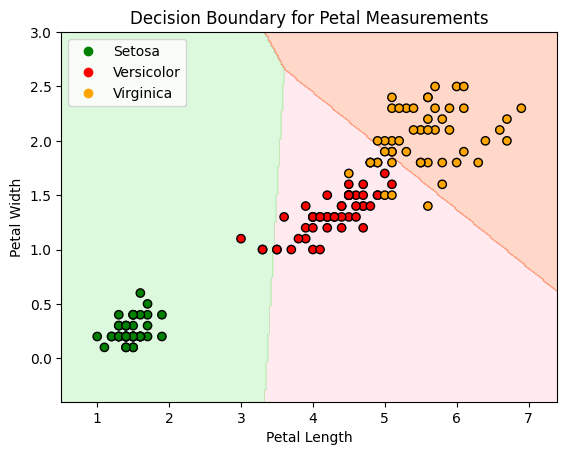

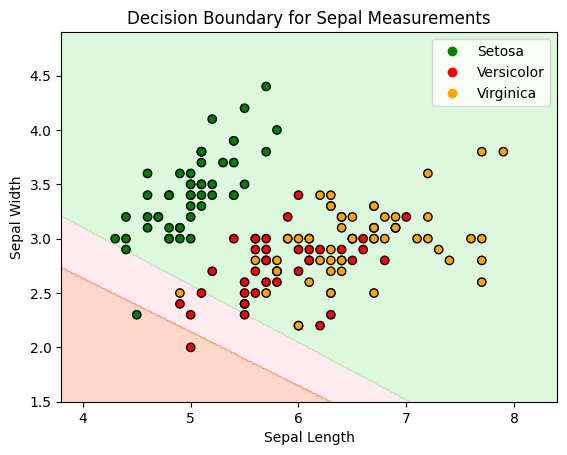

In [119]:
plot_decision_boundary(X, y, W_trained, b_trained, feature_set="petal")
plot_decision_boundary(X, y, W_trained, b_trained, feature_set="sepal")

**Conclusion: Decision Boundaries for Sepal vs. Petal Measurements**  

From the decision boundary plots, we can draw the following conclusions:  

1. **Petal Measurements Provide Clearer Separation**  
   - The petal-based decision boundary shows **three distinct regions**, effectively classifying Setosa, Versicolor, and Virginica.  
   - The transition between Versicolor and Virginica is still present but is much more structured compared to the sepal-based decision boundary.  

2. **Sepal Measurements Alone Are Insufficient**  
   - The decision boundary using sepal measurements struggled to separate Versicolor and Virginica.  
   - There is **significant overlap** between these two classes, leading to poor decision boundaries.  
   - This aligns with the higher cost function value when using only sepals.  

3. **Petal Measurements Are the Dominant Features**  
   - Since petal-based classification already achieves **high accuracy (98%)**, it suggests that petal features carry the most useful information for distinguishing species.  
   - The clear separation between Setosa, Versicolor, and Virginica demonstrates that petal length and petal width are strong discriminators.  

4. **Potential Improvement with Combined Features**  
   - Using both petal and sepal measurements might **further refine the boundary** and improve classification, especially in areas where Versicolor and Virginica overlap.  
   - The cost function reduction from **0.08 (petals) to 0.049 (both features)** suggests that adding sepals provides subtle but useful refinements.  

**Final Takeaway:**  
- **Petal measurements alone are highly effective** for classification.  
- **Sepal measurements alone are unreliable**, particularly for distinguishing Versicolor and Virginica.  
- **Using both features improves the model slightly**, but most of the predictive power comes from petal measurements.  
